In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

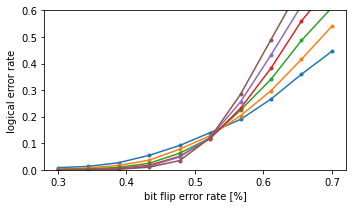

In [217]:
repeat = 10
L_list = [8,10,12,14,16,18]

plt.figure(1,figsize=(5,3))
for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    if not first:
        # plt.plot(100*p1_list,fail_prob_avg/Ntot,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        plt.plot(100*p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))

for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_fine.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    # if not first:
        # plt.plot(p1_list,fail_prob_avg/Ntot,".-", color="C%d" % (i_L),label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))


# plt.plot([0.0293,0.0293],[0,0.8],"k--")
plt.xticks(np.arange(0.3,0.71,0.1))
# plt.yscale("log")
plt.ylim([0.0,0.6])
plt.xlabel("bit flip error rate [%]")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.grid()
plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## critical exponent

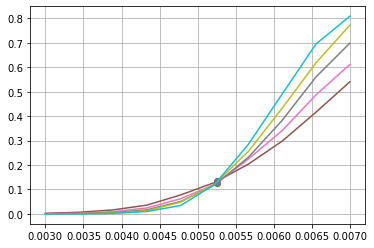

In [278]:
### loading data
repeat = 20
L_list = [10,12,14,16,18]
# L_list = [6,8,10] # [10,12,14,16]#
prob_l = 0.

p_loss = np.array([0,0.01,0.05,0.1,0.15,0.18,0.2,0.249])
p_th = np.array([0.00525,0.0051,0.0042,0.0031,0.002,0.00127,0.0008,0])
pc0 = p_th[np.argwhere(p_loss==prob_l)[0,0]]

failure_ratio_tot = np.zeros((len(L_list),10))

# plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        # fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            # p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            # loss_prob_avg += loss_prob
            Ntot += Nrep
    if not first:
        failure_ratio_tot[i_L,:]=(fail_prob_avg/Ntot)
        # plt.plot(p1_list,failure_ratio_tot[i_L,:],".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

plt.figure()
Svals = np.copy(failure_ratio_tot)

for i_L, L in enumerate(L_list):
    fc = np.interp(pc0,p1_list,Svals[i_L,:])
    Svals[i_L,:] -= fc
    plt.plot(pc0,fc,"o")
    # z = np.polyfit(xvals,yvals, 2)
    # slope, intercept, r_value[i_nu,i_L], p_value, std_err = scipy.stats.linregress(xvals,yvals)
    # plt.plot(xvals,np.abs(Svals[i_L,:]),"o", label="L=%d" % (L))
# plt.plot(ν_list, r_value)
# plt.plot(p1_list,Svals.T)
plt.plot(p1_list,failure_ratio_tot.T)
plt.grid()
# plt.legend()
plt.show()



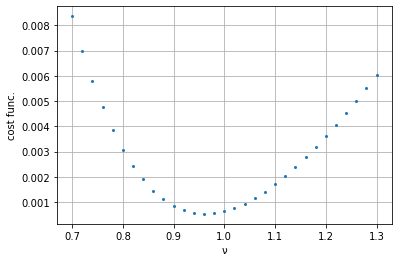

In [279]:
## tuning ν
############
ν_list = np.arange(0.7,1.3,0.02)
cost= np.zeros(len(ν_list))

r_value= np.zeros((len(ν_list),len(L_list)))
for i_nu, ν in enumerate(ν_list):
    xvals = np.zeros((len(L_list),len(p1_list)))
    for i_L, L in enumerate(L_list):
        xvals[i_L,:] = (p1_list-pc0) * L**(1/ν)
    xi = np.linspace(xvals[0,0],xvals[0,-1])
    # plt.plot(xvals,Svals,"o")
    y_vec = np.zeros((len(L_list),len(xi)))
    for i_L, L in enumerate(L_list):
        y_vec[i_L,:] = np.interp(xi,xvals[i_L,:] ,Svals[i_L,:] )
    cost[i_nu] = np.sum(np.var(y_vec,axis = 0))
    
        
# # plt.plot(ν_list, r_value)
# # plt.plot(p1_list,Svals.T)
# plt.plot(p1_list,failure_ratio_tot.T)
# plt.grid()
# # plt.legend()
# plt.show()

plt.figure()
plt.plot(ν_list, cost,".",markersize=4)
plt.ylabel("cost func.")
plt.xlabel("ν")
plt.grid()

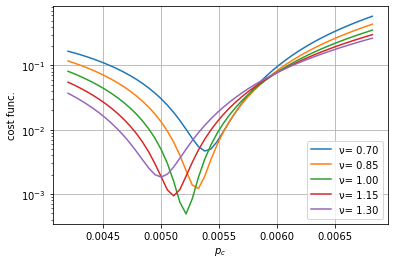

In [280]:
## tuning pc
############
ν_list = np.linspace(0.7,1.3,5)

plt.figure()

for ν in ν_list:
    pc_list = np.linspace(0.8,1.3)*pc0
    cost= np.zeros(len(pc_list))

    r_value= np.zeros((len(pc_list),len(L_list)))
    for i_p, pc in enumerate(pc_list):
        xvals = np.zeros((len(L_list),len(p1_list)))
        for i_L, L in enumerate(L_list):
            xvals[i_L,:] = (p1_list-pc) * L**(1/ν)
        xi = np.linspace(xvals[0,0],xvals[0,-1])
        # plt.plot(xvals,Svals,"o")
        y_vec = np.zeros((len(L_list),len(xi)))
        for i_L, L in enumerate(L_list):
            y_vec[i_L,:] = np.interp(xi,xvals[i_L,:] ,Svals[i_L,:] )
        cost[i_p] = np.sum(np.var(y_vec,axis = 0))

    plt.plot(pc_list, cost,"-",markersize=4,label="ν= %.2f" % (ν))
    
plt.ylabel("cost func.")
plt.xlabel(r"$p_c$")
plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

## data collapse

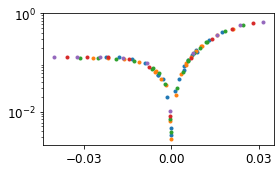

In [159]:
### loading data
repeat = 20
L_list = [10,12,14,16,18]
# L_list = [6,8,10] # [10,12,14,16]#
prob_l = 0.
ν = 1

p_loss = np.array([0,0.01,0.05,0.1,0.15,0.18,0.2,0.249])
p_th = np.array([0.00525,0.0051,0.0042,0.0031,0.002,0.00127,0.0008,0])
pc0 = p_th[np.argwhere(p_loss==prob_l)[0,0]]

failure_ratio_tot = np.zeros((len(L_list),10))

plt.figure(1,figsize=(4,2.5))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        # fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        # fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_fine.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            # p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            # loss_prob_avg += loss_prob
            Ntot += Nrep
    if not first:
        # failure_ratio_tot[i_L,:]=(fail_prob_avg/Ntot)
        # plt.plot((pc0-p1_list)*L**(1/ν),np.abs(failure_ratio_tot[i_L,:]-0.12),".", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        fc = np.interp(pc0,p1_list,fail_prob_avg/Ntot)
        plt.plot((p1_list-pc0)*L**(1/ν),np.abs(fail_prob_avg/Ntot-fc),".", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

    
    first = True
    for i_rep in range(repeat):
        # fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)
        # fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_fine.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            # p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            # loss_prob_avg += loss_prob
            Ntot += Nrep
    if not first:
        fc = np.interp(pc0,p1_list,fail_prob_avg/Ntot)
        plt.plot((p1_list-pc0)*L**(1/ν),np.abs(fail_prob_avg/Ntot-fc),".", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))


plt.yscale("log")
# plt.ylim([1e-3,1])
plt.yticks([1e-2,1],fontsize=12)
plt.xticks([-0.03,0,0.03],fontsize=12)
plt.tight_layout()
plt.savefig("figs/scaling-collapse.pdf")
plt.show()

## with loss

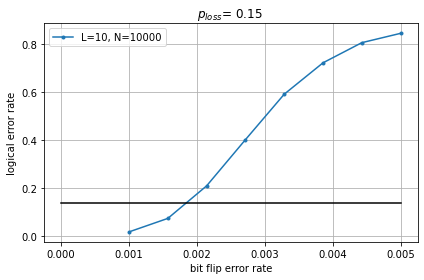

In [105]:
repeat = 20
L_list = [10,12,14,16]
prob_l = 0.15

plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(p1_list,failure_ratio,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(p1_list,failure_ratio,"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))


yc = 0.14
plt.plot([0.0,max(p1_list)],[yc,yc],"k")

plt.legend()
plt.title(r"$p_{loss} $= %.2f " % (prob_l))
# plt.yscale("log")
# plt.ylim([7e-2,7e-1])
# plt.xlim([0.0,1e-3])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.0s6,0.1,0.01))
plt.grid()
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

[ 7.90143692e-05 -2.37127330e-02  5.33662487e-01]


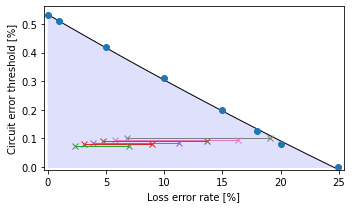

In [344]:
p_loss = np.array([0,1,5,10,15,18,20,24.88])
p_th = np.array([0.53,0.51,0.42,0.31,0.2,0.127,0.08,0])
# p_th = np.array([0.295-0.314,0.195,,0.08-0.09])/100
# p_loss = [0,0.05,0.1,0.15,0.18,0.2,0.249]
# p_th = [0.00525,0.0042,0.0031,0.002,0.00127,0.0008,0]


z = np.polyfit(p_loss, p_th, 2)
print(z)
x_plot = np.linspace(min(p_loss),1.2*max(p_loss))
y_plot = z[2]+z[1]*x_plot + z[0]*x_plot**2

    
plt.figure(1,figsize=(5,3))
plt.plot(x_plot,y_plot,"k",linewidth=1)
inds = np.argwhere(y_plot>0)[:,0]
plt.fill_between(x_plot[inds],y_plot[inds],color="#DFE0FB")
plt.plot(p_loss,p_th,"o")
# plt.plot([0.2488],[0],"*")

λlist = np.array([1,3]) # dB/km optical fiber loss
# τlist= [1,10,50] # nsec
τ = 10 # nsec
speed = 2.13e8 # m/s
L_list = np.arange(12,6,-1)

for i_L,L in enumerate(L_list):
    p_loss = 1-10**(-(λlist*speed*1e-3*τ*1e-9)/10 *L**2)
    plt.plot(100*p_loss,1e-1-0.005*i_L+p_loss*0,"x-", linewidth=1, color = "C%d" % (7-i_L))

plt.ylabel("Circuit error threshold [%]")
plt.xlabel("Loss error rate [%]")
plt.xticks(100*np.arange(0,0.26,0.05))
plt.yticks(100*np.arange(0,0.0051,0.001))
plt.xlim([-3e-1,25.4])
plt.ylim([-1e-2,1.06*max(p_th)])
plt.tight_layout()
# plt.savefig("figs/loss_error_phasediag.pdf")
plt.show()

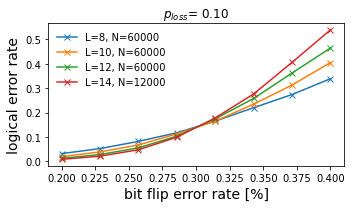

In [456]:
### 0.2 loss
repeat = 60
L_list = [8,10,12,14,16]
prob_l = 0.1

plt.figure(1,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    
    for i_rep in range(repeat):
        # fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
        fname = "draft_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep_loss  = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']
            if min(p1_list)<4e-4:
                print(L, i_rep)
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
            
    # for i_rep in range(repeat):
    #     fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
    #     if os.path.exists(fname):
    #         npz_file = np.load(fname)
    #         p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
    #         if first :
    #             first = False
    #             fail_prob_avg = np.zeros(len(p1_list))
    #             loss_prob_avg = 0
    #             Ntot_loss = 0
    #             Ntot_flip = 0
    #             Ntot = 0
    #         fail_prob_avg += (fail_prob_z+loss_prob)
    #         loss_prob_avg += loss_prob
    #         Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(100*p1_list,failure_ratio,"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        # plt.plot(100*p1_list,failure_ratio,"x-", color="C%d" % (i_L), label="L=%d" % L)



plt.legend(frameon=False)
plt.title(r"$p_{loss} $= %.2f " % (prob_l))
fsize = 14
# if prob_l>= 0.18:
#     plt.xticks(np.arange(0,0.151,0.05),fontsize=fsize)
#     plt.yticks(np.arange(0,0.71,0.2),fontsize=fsize)
# else:
#     plt.xticks(np.arange(0.1,0.56,0.1),fontsize=fsize)
#     plt.yticks(np.arange(0,0.81,0.2),fontsize=fsize)

# plt.ylim([0.0,0.4])
# plt.yscale("log")
# plt.grid()
plt.xlabel("bit flip error rate [%]",fontsize=fsize)
plt.ylabel("logical error rate",fontsize=fsize)
plt.tight_layout()
# plt.savefig("figs/qdot_loss_%.2f_threshold.pdf" % (prob_l))
plt.show()

## critical exponent

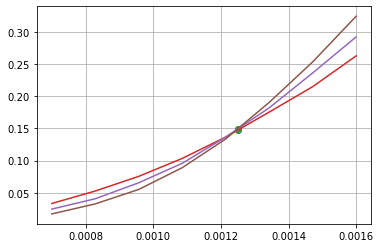

In [453]:
### loading data
repeat = 60
L_list = [10,12,14]
# L_list = [6,8,10] # [10,12,14,16]#
prob_l = 0.18

p_loss = np.array([0,0.01,0.05,0.1,0.15,0.18,0.2,0.249])
p_th = np.array([0.00525,0.0051,0.0042,0.003,0.00188,0.00125,0.0008,0])
pc0 = p_th[np.argwhere(p_loss==prob_l)[0,0]]

failure_ratio_tot = np.zeros((len(L_list),8))

# plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "draft_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep_loss  = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']

            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            # loss_prob_avg += loss_prob
            Ntot += Nrep
    # for i_rep in range(repeat):
    #     fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
    #     if os.path.exists(fname):
    #         npz_file = np.load(fname)
    #         p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
    #         if first :
    #             first = False
    #             fail_prob_avg = np.zeros(len(p1_list))
    #             loss_prob_avg = 0
    #             Ntot_loss = 0
    #             Ntot_flip = 0
    #             Ntot = 0
    #         fail_prob_avg += (fail_prob_z+loss_prob)
    #         loss_prob_avg += loss_prob
    #         Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob            
    if not first:
        failure_ratio_tot[i_L,:]=(fail_prob_avg/Ntot)
        # plt.plot(p1_list,failure_ratio_tot[i_L,:],".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

plt.figure()
Svals = np.copy(failure_ratio_tot)

for i_L, L in enumerate(L_list):
    fc = np.interp(pc0,p1_list,Svals[i_L,:])
    # Svals[i_L,:] -= fc
    plt.plot(pc0,fc,"o")
plt.plot(p1_list,failure_ratio_tot.T)
plt.grid()
plt.show()

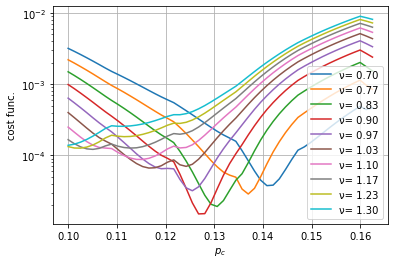

In [454]:
## tuning pc
############
ν_list = np.linspace(0.7,1.3,10)
Svals = np.copy(failure_ratio_tot)

plt.figure()

for ν in ν_list:
    pc_list = np.linspace(0.8,1.3)*pc0
    cost= np.zeros(len(pc_list))

    r_value= np.zeros((len(pc_list),len(L_list)))
    for i_p, pc in enumerate(pc_list):
        xvals = np.zeros((len(L_list),len(p1_list)))
        for i_L, L in enumerate(L_list):
            xvals[i_L,:] = (p1_list-pc) * L**(1/ν)
        xi = np.linspace(xvals[0,0],xvals[0,-1])
        # plt.plot(xvals,Svals,"o")
        y_vec = np.zeros((len(L_list),len(xi)))
        for i_L, L in enumerate(L_list):
            fc = np.interp(pc,p1_list,Svals[i_L,:])
            Svals[i_L,:] -= fc
            y_vec[i_L,:] = np.interp(xi,xvals[i_L,:] ,Svals[i_L,:] )
        cost[i_p] = np.sum(np.var(y_vec,axis = 0))

    plt.plot(100*pc_list, cost,"-",markersize=4,label="ν= %.2f" % (ν))
    if ν == 1:
        print(100*pc_list[np.argmin(cost)])
plt.ylabel("cost func.")
plt.xlabel(r"$p_c$")
plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

# [0.295-0.314,0.195,0.08-0.09]

## collapse

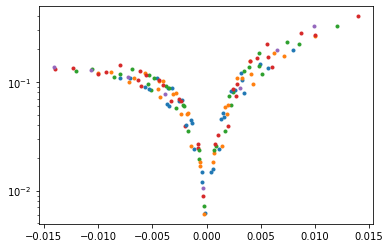

In [455]:
### loading data
repeat = 60
p_loss = np.array([0.01,0.05,0.1,0.15,0.18,0.2])
# p_th = np.array([0.0051,0.0042,0.003,0.0019,0.00127,0.0008])
p_th = np.array([0.00525,0.0042,0.003,0.00188,0.00127,0.0008,0])
ν = 1

plt.figure(1)#,figsize=(4,2.5))

for prob_l in p_loss:
    pc0 = p_th[np.argwhere(p_loss==prob_l)[0,0]]
    # if prob_l>= 0.18:
    L_list = [8,10,12,14,16]
    # else:
        # L_list = [6,8,10,12]
    
    for i_L, L in enumerate(L_list):
        first = True
        for i_rep in range(repeat):
            # if prob_l>=0.18:
            #     fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
            # else:
            #     fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
            # if os.path.exists(fname):
            #     npz_file = np.load(fname)
            #     p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            fname = "draft_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d.npz" % (prob_l,L,i_rep)
            if os.path.exists(fname):
                npz_file = np.load(fname)
                p1_list, fail_prob_z, Nrep_loss  = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']
            
                if first :
                    first = False
                    fail_prob_avg = np.zeros(len(p1_list))
                    Ntot = 0
                fail_prob_avg += fail_prob_z
                Ntot += Nrep_loss
        if not first:
            # plt.plot((pc0-p1_list)*L,np.abs(fail_prob_avg/Ntot-0.12),".", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
            fc = np.interp(pc0,p1_list,fail_prob_avg/Ntot)
            # print(fc)
            plt.plot((p1_list-pc0)*L**(1/ν),np.abs(fail_prob_avg/Ntot-fc),".", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
            # plt.plot(p1_list,fail_prob_avg/Ntot,"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
            # plt.plot(pc0,fc,"*", color="C%d" % (i_L))



plt.yscale("log")
# plt.ylim([1e-3,1])
# plt.yticks([1e-2,1],fontsize=12)
# plt.xticks([-0.03,0,0.03],fontsize=12)
# plt.tight_layout()
# plt.savefig("figs/scaling-collapse.pdf")
plt.show()

## logical error vs. system size

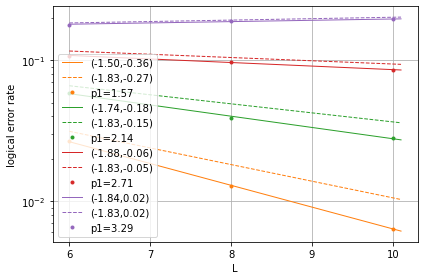

In [54]:
repeat = 20
L_list = [6,8,10]#[10,12,14,16]
prob_l = 0.1

failure_ratio_tot = np.zeros((len(L_list),8))
# plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio_tot[i_L,:]=(fail_prob_avg/Ntot)
        # plt.plot(p1_list,failure_ratio_tot[i_L,:],".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

plt.figure(1)
for i_p, p1 in enumerate(p1_list):
    # if p1<0.00125:
    if i_p in [1,2,3,4]:
    # if i_p in [3,4,5]:
        z = np.polyfit(L_list, np.log(failure_ratio_tot[:,i_p]), 1)
        x_plot = np.linspace(min(L_list),1.01*max(L_list))
        y_plot = np.exp(z[1]+ z[0]*x_plot)
        plt.plot(x_plot,y_plot, color="C%d" % (i_p),linewidth=1, label="(%.2f,%.2f)" % (z[1],z[0]))
        if prob_l==0.1:
            p_th = 0.0031
        elif prob_l==0.15:
            p_th = 0.002
        elif prob_l==0.18:
            p_th = 0.00125            
        elif prob_l==0.2:
            p_th = 0.00075
        z[0]= np.log(p1/p_th)*(1/2-prob_l)
        z[1] = np.log(0.16)
        x_plot = np.linspace(min(L_list),1.01*max(L_list))
        y_plot = np.exp(z[1]+ z[0]*x_plot)
        plt.plot(x_plot,y_plot,"--", color="C%d" % (i_p),linewidth=1, label="(%.2f,%.2f)" % (z[1],z[0]))
        plt.plot(L_list,failure_ratio_tot[:,i_p],".", color="C%d" % (i_p), label="p1=%.2f" % (p1*1e3))
        

plt.legend()
# plt.title(r"$p_{loss} $= %.2f " % (prob_l))
plt.grid()
plt.yscale("log")
plt.xlabel("L")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

In [578]:
np.exp(-1.83)

0.16041356777517274

In [498]:
η = -(0.1/(-np.log(1e-3)-2))**2 * np.log(1-0.19)
print(η)
speed = 2.13e8
λ = 10/np.log(10) * η/(speed*1e-8) * 1e3
print(λ)

8.748671010632285e-05
0.17838026027720877


In [491]:
loss_rate_fiber = 0.2 ## dB/km
dist = 1 # km
1-10**(-loss_rate_fiber/10*dist)

0.045007413978564004

## compare loss and no loss

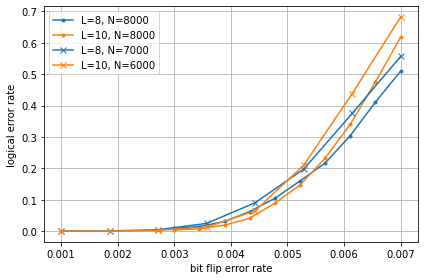

In [280]:
repeat = 24
L_list = [8,10]#[8,10,12,14,16,18]
prob_l = 0.01

plt.figure(1)#,figsize=(5,3))
for i_L,L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_qdot/" + "p1_eq_p2_L_%d_i_%d_new.npz" % (L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, fail_prob_z, Nrep = npz_file['p1_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    if not first:
        plt.plot(p1_list,fail_prob_avg/Ntot/(7/8),".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
    # plt.plot(p1_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))

for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        loss_ratio = loss_prob_avg/Ntot   
        plt.plot(p1_list,failure_ratio/(7/8),"x-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

# plt.plot([0.0293,0.0293],[0,0.8],"k--")
# plt.xticks(np.arange(0.004,0.0071,0.001))
# plt.yscale("log")
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
plt.legend()
plt.tight_layout()
plt.grid()
# plt.savefig("figs/fcts-threshold.pdf")
plt.show()

## compare different loss rates

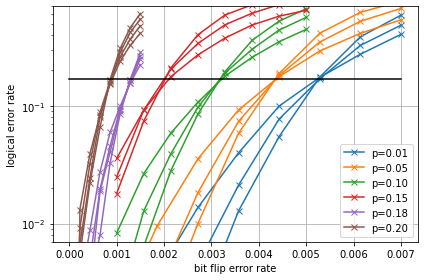

In [176]:
repeat = 20
pl_list = [0.01,0.05,0.1,0.15,0.18,0.2]

c = -1
plt.figure(1)#,figsize=(5,3))
for prob_l in pl_list:
    c += 1
    if prob_l>= 0.18:
        L_list = [10,12,14,16]
    else:
        L_list = [6,8,10,12]
    first_plot = True
    for i_L, L in enumerate(L_list):
        first = True
        for i_rep in range(repeat):
            if prob_l>=0.18:
                fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
            else:
                fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new.npz" % (prob_l,L,i_rep)
            if os.path.exists(fname):
                npz_file = np.load(fname)
                p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
                if first :
                    first = False
                    fail_prob_avg = np.zeros(len(p1_list))
                    loss_prob_avg = 0
                    Ntot_loss = 0
                    Ntot_flip = 0
                    Ntot = 0
                fail_prob_avg += (fail_prob_z+loss_prob)
                loss_prob_avg += loss_prob
                Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
        if not first:
            failure_ratio = fail_prob_avg/Ntot   
            loss_ratio = loss_prob_avg/Ntot   
            # plt.plot(p1_list,failure_ratio,"x-", label="p=%.2f, L=%d" % (prob_l,L))
            if first_plot:
                plt.plot(p1_list,failure_ratio,"x-", color = "C%d" % (c), label="p=%.2f" % (prob_l))
                first_plot = False
            else:
                plt.plot(p1_list,failure_ratio,"x-", color = "C%d" % (c))


yc = 0.17
plt.plot([0.0,0.007],[yc,yc],"k")
plt.legend()
plt.yscale("log")
plt.ylim([7e-3,7e-1])
# plt.xlim([0.0,1e-3])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.0s6,0.1,0.01))
plt.grid()
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()